In [390]:
#Importing Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [424]:
# Reading Dataset
data = pd.read_csv("Test_Data.csv")
data.drop(['Unnamed: 0'],axis=1,inplace = True)
data.head()

,A,B,C,D,E,F,G,H,I,J,...,Y6,Y7,Y8,Y9,Z1,Z2,Z4,Z5,Z6,Class
0,6,860.62,809.73,919.69,30.87,69.81,65.24,74.10,2.51,2,...,0.002757,-0.003582,0.000125,0.001961,-3.290000e-08,0.000346,0.000956,9.150000e-07,1.190000e-07,A
1,7,871.58,789.74,929.69,32.82,68.94,64.54,75.97,2.65,5,...,0.002757,-0.002944,0.000131,0.001932,-3.290000e-08,0.000358,0.000888,7.880000e-07,1.280000e-07,A
2,6,854.87,789.74,929.69,32.38,70.29,64.54,75.97,2.66,4,...,0.003168,-0.002944,0.000125,0.001628,-3.290000e-08,0.000339,0.000875,7.660000e-07,1.150000e-07,A
3,7,823.73,759.75,879.71,29.19,72.93,68.20,78.97,2.58,0,...,0.003168,-0.002490,0.000116,0.001572,-3.290000e-08,0.000308,0.000856,7.330000e-07,9.480000e-08,A
4,6,823.44,759.75,879.71,28.98,72.96,68.20,78.97,2.56,0,...,0.003091,-0.002601,0.000126,0.001596,-3.290000e-08,0.000318,0.000913,8.330000e-07,1.010000e-07,A


In [425]:
data.shape

(5839, 42)

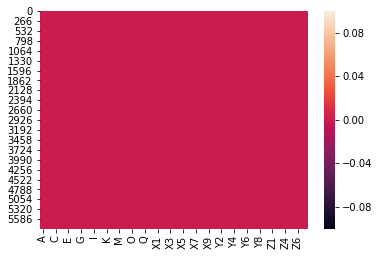

In [451]:
sns.heatmap(data.isnull()) # Dataset doesn't have any missing values

# Encoding

In [426]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
data['Class']= label_encoder.fit_transform(data['Class']) 

In [427]:
data.head()

,A,B,C,D,E,F,G,H,I,J,...,Y6,Y7,Y8,Y9,Z1,Z2,Z4,Z5,Z6,Class
0,6,860.62,809.73,919.69,30.87,69.81,65.24,74.10,2.51,2,...,0.002757,-0.003582,0.000125,0.001961,-3.290000e-08,0.000346,0.000956,9.150000e-07,1.190000e-07,0
1,7,871.58,789.74,929.69,32.82,68.94,64.54,75.97,2.65,5,...,0.002757,-0.002944,0.000131,0.001932,-3.290000e-08,0.000358,0.000888,7.880000e-07,1.280000e-07,0
2,6,854.87,789.74,929.69,32.38,70.29,64.54,75.97,2.66,4,...,0.003168,-0.002944,0.000125,0.001628,-3.290000e-08,0.000339,0.000875,7.660000e-07,1.150000e-07,0
3,7,823.73,759.75,879.71,29.19,72.93,68.20,78.97,2.58,0,...,0.003168,-0.002490,0.000116,0.001572,-3.290000e-08,0.000308,0.000856,7.330000e-07,9.480000e-08,0
4,6,823.44,759.75,879.71,28.98,72.96,68.20,78.97,2.56,0,...,0.003091,-0.002601,0.000126,0.001596,-3.290000e-08,0.000318,0.000913,8.330000e-07,1.010000e-07,0


In [428]:
# Selecting Features and Target
X = data.drop(['Class'],axis = 1)
y = data['Class']

# Splitting the dataset

In [429]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 0)

In [430]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

C:\Users\Loki\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Loki\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
C:\Users\Loki\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  """


# Random Forest

In [431]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=800)
rfc.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=800, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [433]:
# Predicting for X_test data
predictions = rfc.predict(X_test)

# Evaluation

In [434]:
# Evalution of Model
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.65      0.71      0.68       310
           1       0.68      0.64      0.66       356
           2       0.77      0.86      0.81       481
           3       0.91      0.50      0.64        78
           4       0.85      0.78      0.81       317
           5       0.80      0.80      0.80       210

   micro avg       0.75      0.75      0.75      1752
   macro avg       0.78      0.71      0.73      1752
weighted avg       0.75      0.75      0.75      1752



# XGBoost

In [435]:
from xgboost import XGBClassifier, XGBRegressor
model = XGBClassifier(n_estimators=800)
model.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0, learning_rate=0.1,
       max_delta_step=0, max_depth=3, min_child_weight=1, missing=None,
       n_estimators=800, n_jobs=1, nthread=None,
       objective='multi:softprob', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=None,
       subsample=1, verbosity=1)

In [436]:
# Predicting
y_pred = model.predict(X_test)

In [437]:
# Evaluation of Model
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.62      0.65      0.63       310
           1       0.63      0.63      0.63       356
           2       0.79      0.83      0.81       481
           3       0.81      0.49      0.61        78
           4       0.84      0.83      0.84       317
           5       0.80      0.80      0.80       210

   micro avg       0.74      0.74      0.74      1752
   macro avg       0.75      0.70      0.72      1752
weighted avg       0.74      0.74      0.74      1752



# PCA

In [438]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit_transform(X)
scaled_data =  sc.transform(X)

C:\Users\Loki\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Loki\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
C:\Users\Loki\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  """


In [439]:
scaled_data

array([[-0.7524833 , -0.10728189,  0.30498871, ..., -0.25033077,
        -0.04482073, -0.05295035],
       [-0.52745129, -0.05075213,  0.1993349 , ..., -0.25136744,
        -0.04482194, -0.05294927],
       [-0.7524833 , -0.13693938,  0.1993349 , ..., -0.25155622,
        -0.04482215, -0.05295083],
       ...,
       [-0.07738727, -0.850576  , -0.91021503, ...,  1.19306743,
         0.04420685,  0.26126837],
       [-0.07738727, -0.93562853, -0.91021503, ...,  1.2150836 ,
         0.04691635,  0.26209536],
       [-0.30241928, -0.5788618 , -0.38189315, ..., -0.00662186,
        -0.04203717, -0.05293144]])

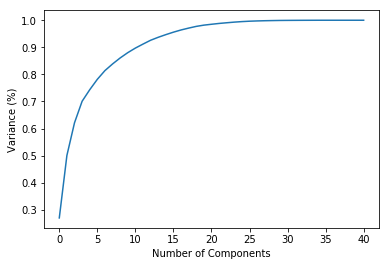

In [440]:
#Fitting the PCA algorithm with our Data
pca = PCA().fit(scaled_data)
#Plotting the Cumulative Summation of the Explained Variance
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)') #for each component
plt.show()

In [445]:
# Doing PCA
from sklearn.decomposition import PCA
pca = PCA(n_components=23) 
pca.fit(scaled_data)


PCA(copy=True, iterated_power='auto', n_components=23, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [446]:
x_pca = pca.transform(scaled_data)
x_pca.shape

(5839, 23)

In [447]:
# Splitting the Dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x_pca, y, test_size = 0.25, random_state = 0)

In [448]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=600)
rfc.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=600, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [449]:
pred_aftr_pca = rfc.predict(X_test)
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,pred_aftr_pca))

              precision    recall  f1-score   support

           0       0.51      0.49      0.50       254
           1       0.49      0.48      0.48       294
           2       0.61      0.81      0.70       401
           3       0.80      0.24      0.37        66
           4       0.68      0.58      0.63       270
           5       0.64      0.55      0.59       175

   micro avg       0.59      0.59      0.59      1460
   macro avg       0.62      0.52      0.54      1460
weighted avg       0.59      0.59      0.58      1460



# Note
           We are doing classification of the dataset without any Preprocessing.